In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


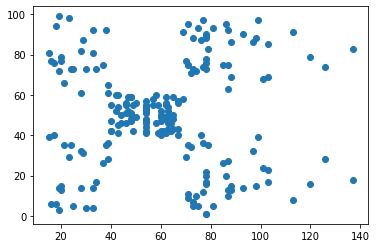

In [13]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.show()

In [14]:
X = df.iloc[:, [3, 4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X[["Annual Income (k$)"]])
X["Annual Income (k$)"] = scaler.transform(X[["Annual Income (k$)"]])

scaler.fit(X[["Spending Score (1-100)"]])
X["Spending Score (1-100)"] = scaler.transform(X[["Spending Score (1-100)"]])
X

<ipython-input-15-47f0dd3384f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Annual Income (k$)"] = scaler.transform(X[["Annual Income (k$)"]])
<ipython-input-15-47f0dd3384f2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Spending Score (1-100)"] = scaler.transform(X[["Spending Score (1-100)"]])


,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


In [16]:
from sklearn.cluster import KMeans

sse = []
k_rng = range(1, 11)
for k in k_rng:
  k_means = KMeans(n_clusters=k)
  k_means.fit(X)
  sse.append(k_means.inertia_)

sse

[23.040720326039906,
 13.993505283127979,
 9.058985215159455,
 6.110312266413655,
 3.583117905952559,
 3.0987079488159965,
 2.6260623772655123,
 2.236640186183643,
 1.873875095904132,
 1.638550716902457]

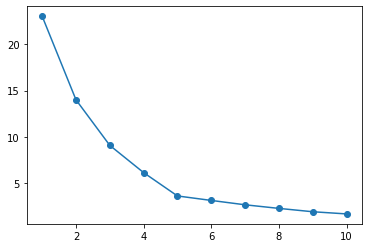

In [17]:
plt.scatter(k_rng, sse)
plt.plot(k_rng, sse)

In [18]:
# from the graph we can see that the optimal number of cluster will be 5
K_Means = KMeans(n_clusters=5)
y_predicted = K_Means.fit_predict(X[["Annual Income (k$)", "Spending Score (1-100)"]])
y_predicted

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [19]:
X['cluster'] = y_predicted
X

<ipython-input-19-5f2382c411b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = y_predicted


,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,0.387755,0
1,0.000000,0.816327,4
2,0.008197,0.051020,0
3,0.008197,0.775510,4
4,0.016393,0.397959,0
...,...,...,...
195,0.860656,0.795918,2
196,0.909836,0.275510,3
197,0.909836,0.744898,2
198,1.000000,0.173469,3


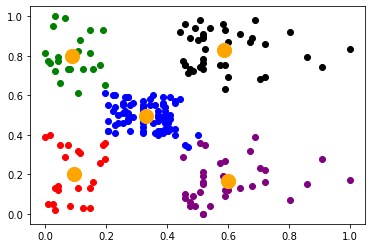

In [20]:
plt.scatter(X.iloc[y_predicted == 0, 0], X.iloc[y_predicted == 0, 1], c="red", label="Cluster 1")
plt.scatter(X.iloc[y_predicted == 1, 0], X.iloc[y_predicted == 1, 1], c="blue", label="Cluster 2")
plt.scatter(X.iloc[y_predicted == 2, 0], X.iloc[y_predicted == 2, 1], c="black", label="Cluster 3")
plt.scatter(X.iloc[y_predicted == 3, 0], X.iloc[y_predicted == 3, 1], c="purple", label="Cluster 4")
plt.scatter(X.iloc[y_predicted == 4, 0], X.iloc[y_predicted == 4, 1], c="green", label="Cluster 5")
plt.scatter(K_Means.cluster_centers_[:, 0], K_Means.cluster_centers_[:, 1], s=200, c="orange", label="Cluster Centers")